### Import packages

In [10]:
%run '1_import_packages_functions.ipynb'

### Load data

In [12]:
# define the data and key parameters in the model

labels = 5

X = np.load('X_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000.npy')
y = np.load('y_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000.npy')

X.shape
y.shape

(4703, 200, 200, 3)

(4703, 5)

### Statistical check

In [13]:
stats = [np.min, np.max, np.mean, np.std]
stats_str = ['min -', 'max -', 'mean- ', 'std -']
print('X')
for index, stat in enumerate(stats):
    print(stats_str[index], stat(X))
print('y')
for index, stat in enumerate(stats):
    print(stats_str[index], stat(y))

X
min - 0.0
max - 1.0
mean-  0.450045
std - 0.256724
y
min - 0.0
max - 1.0
mean-  0.2
std - 0.4


### Train/Test split 

In [14]:
# Within the total data: 80% for training, 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.8*len(X)), random_state=42)

In [15]:
print('Dimensions\n---')
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

Dimensions
---
X_train (3762, 200, 200, 3)
X_test (941, 200, 200, 3)
y_train (3762, 5)
y_test (941, 5)


# Modeling

In [16]:
input_dimension = (200, 200, 3)

model = Sequential()

# Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_dimension))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # to avoid overfitting

# Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())

# Layer 3
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))

# Layer 4
model.add(Dense(labels, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### View the model

In [17]:
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
# model.summary()

# Training!
### Model-1: general

In [18]:
model.fit(X_train, y_train,
          batch_size=20,
          epochs=10, #10
          verbose=1,
          validation_data=(X_test, y_test))

Train on 3762 samples, validate on 941 samples
Epoch 1/10
3762/3762 [==============================] - 643s 171ms/step - loss: 1.6544 - acc: 0.4359 - val_loss: 1.0361 - val_acc: 0.5887
Epoch 2/10
3762/3762 [==============================] - 421s 112ms/step - loss: 0.9056 - acc: 0.5938 - val_loss: 0.8645 - val_acc: 0.6684
Epoch 3/10
3762/3762 [==============================] - 395s 105ms/step - loss: 0.6326 - acc: 0.7610 - val_loss: 0.7601 - val_acc: 0.7205
Epoch 4/10
3762/3762 [==============================] - 500s 133ms/step - loss: 0.4723 - acc: 0.8320 - val_loss: 0.5896 - val_acc: 0.8045
Epoch 5/10
3762/3762 [==============================] - 510s 136ms/step - loss: 0.3248 - acc: 0.8828 - val_loss: 0.5562 - val_acc: 0.8162
Epoch 6/10
3762/3762 [==============================] - 511s 136ms/step - loss: 0.2715 - acc: 0.9086 - val_loss: 0.4909 - val_acc: 0.8438
Epoch 7/10
3762/3762 [==============================] - 457s 122ms/step - loss: 0.2277 - acc: 0.9165 - val_loss: 0.4745 - val

### Save the model

In [19]:
model.save('model_1207_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000_epochs-5.h5')
model.save_weights('model_weights_1207_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000_epochs-5.h5')

# Validation & Testing

### 1. Validate with test dataset

In [14]:
## model = load_model('my_model_1204_1000_clear_1000_blurry.h5')

score = model.evaluate(X_test, y_test, verbose=1)
print('accuracy: ',score[1])
print('loss: ',score[0])

741/741 [==============================] - 18s 24ms/step
accuracy:  0.866396761214
loss:  0.458138855202


### 2. Validate with separate test dataset

In [14]:
model_path = '/Users/MingTang/Documents/Data_Science/00_Project/00_Image_CNN/model_2-labels_clear-1000_blurry-1000/my_model_1204_1000_clear_1000_blurry.h5'

model_path ='/Users/MingTang/Documents/Data_Science/00_Project/00_Image_CNN/model_1207_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000_epochs-5/model_1207_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000_epochs-5.h5'
model = load_model(model_path)

Folder:  test_dog


'This is DS_Store file'

Folder:  test_dog
[1] [[  1.11406166e-02   9.04282689e-01   5.70489792e-05   1.55227588e-06
    8.45180601e-02]]


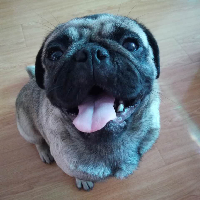

Folder:  test_dog
[0] [[  6.22888088e-01   2.89622724e-01   2.47497577e-04   1.81728916e-03
    8.54244158e-02]]


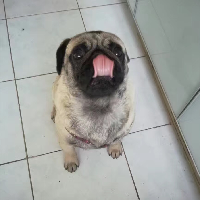

Folder:  test_dog
[2] [[  3.53204960e-05   2.12814528e-04   9.97055650e-01   2.62227724e-03
    7.39283714e-05]]


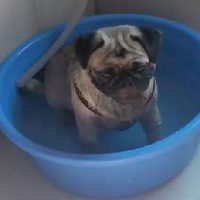

Folder:  test_dog
[1] [[  6.99485913e-02   8.19717944e-01   8.30636964e-06   2.11462023e-07
    1.10324956e-01]]


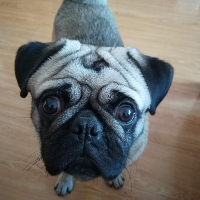

Folder:  test_dog


IndexError: list index out of range

In [15]:
# We shall use the predefined function of 'predict_folder_image_test' here

#  folder_path_test = '/Users/MingTang/Documents/Data_Science/00_Project/00_Image_CNN/datasets/0_All/test_cat'
folder_path_test = '/Users/MingTang/Documents/Data_Science/00_Project/00_Image_CNN/datasets/0_All/test_dog'

for i in range(10):
    # image_index = 10
    predict_folder_image(folder_path_test, i)
# predict_folder_image_test(folder_path_3, image_index)

# Model with image augmentation

In [21]:
print('Import the data ...')
X = np.load('X_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000.npy')
y = np.load('y_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000.npy')

print('Train/test splitting ...')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.5*len(X)), random_state=42)

print('Data collection is done!\n')

print('Dimensions\n---')
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

Import the data ...
Train/test splitting ...
Data collection is done!

Dimensions
---
X_train (2351, 200, 200, 3)
X_test (2352, 200, 200, 3)
y_train (2351, 5)
y_test (2352, 5)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

print('Start loading weight ...')
# model.load_weights('my_model_weights_1204_clear_motion_outoffocus.h5')

print('Augmenting the images')
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip = True)

print('Define the stop condition')
callback_earlystop = EarlyStopping(
    monitor='val_acc', 
    patience=2, # patience =number of epochs with no improvement after which training will be stopped 
    verbose=1, 
    mode='auto'
)

print('Check points')
callback_checkpoint = ModelCheckpoint(
    'model_weights_to_save.h5', # string, path to save the model file, 
    monitor='val_acc', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=True, 
    mode='auto',
    period=1
)

# Fit generator
# play with samples/epoch, nb_epoch, val_samples.

print('Fit generator')
model.fit_generator(datagen.flow(X_train, y_train), 
                    samples_per_epoch=1000, 
                    nb_epoch=5, 
                    validation_data=datagen.flow(X_test, y_test), 
                    nb_val_samples=300, 
                    callbacks=[callback_earlystop, callback_checkpoint])

Start loading weight ...
Augmenting the images
Define the stop condition
Check points
Fit generator


/Users/MingTang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:44: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/Users/MingTang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., callbacks=[<keras.ca..., steps_per_epoch=31, epochs=5, validation_steps=300)`


Epoch 1/5


/Users/MingTang/anaconda/lib/python3.6/site-packages/keras/preprocessing/image.py:536: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/MingTang/anaconda/lib/python3.6/site-packages/keras/preprocessing/image.py:544: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


74/31 [=======================================================================] - 308s 4s/step - loss: 0.5923 - acc: 0.7630 - val_loss: 0.5217 - val_acc: 0.8040
Epoch 2/5
74/31 [=======================================================================] - 304s 4s/step - loss: 0.5293 - acc: 0.7976 - val_loss: 0.4975 - val_acc: 0.8091
Epoch 3/5
74/31 [=======================================================================] - 304s 4s/step - loss: 0.5255 - acc: 0.7982 - val_loss: 0.4628 - val_acc: 0.8240
Epoch 4/5
74/31 [=======================================================================] - 355s 5s/step - loss: 0.4834 - acc: 0.8038 - val_loss: 0.5497 - val_acc: 0.8104
Epoch 5/5
22/31 [====================>.........] - ETA: 31s - loss: 0.5692 - acc: 0.7969

In [32]:
model.save('model_1207_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000_aug.h5')
model.save_weights('model_1207_5-labels_clear-1000_out-of-focus-700_gaussian-1000_motion-1000_minifilter-1000_aug_weights.h5')